# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Загрузка данных в датафрейм

In [2]:
df = pd.read_csv('feml_datas/athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## 1.2 Проверка наличия пропущенных значений

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

В данных имеется один пропуск по презнаку **dob** и большое количество пропусков по признакам **height** (330) и **weight** (659)

## 1.3 Работа с пропусками

In [5]:
df[df['dob'].isna()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


Учитывая, что в набдлюдении с пропущенным значением по признаку **dob** имеются еще пропуски значений по двум признакам, можно удалить эту строку полностью.

In [6]:
df = df.dropna(subset=['dob'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11537 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11537 non-null  int64  
 1   name         11537 non-null  object 
 2   nationality  11537 non-null  object 
 3   sex          11537 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11537 non-null  object 
 8   gold         11537 non-null  int64  
 9   silver       11537 non-null  int64  
 10  bronze       11537 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


Пропуски по признакам **weight** и **height** заменим медианой

In [8]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153700e+04,11208.000000,10879.000000,11537.000000,11537.000000,11537.000000
mean,4.999743e+08,1.766282,72.068205,0.057727,0.056774,0.061021
std,2.908734e+08,0.112719,16.177334,0.255920,0.239157,0.243330
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450891e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.001905e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.540254e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [9]:
df.groupby('sport').agg({'height': ['count','mean','median'], 'weight': ['mean','median']})

height                      weight       
                   count      mean median       mean median
sport                                                      
aquatics            1396  1.788338  1.780  72.301644   70.0
archery              126  1.735952  1.740  72.190476   73.5
athletics           2196  1.751922  1.750  67.717727   64.0
badminton            170  1.745529  1.745  68.774390   68.0
basketball           288  1.918715  1.920  87.750000   87.0
boxing               275  1.747745  1.750        NaN    NaN
canoe                328  1.781006  1.780  77.015291   77.0
cycling              504  1.746667  1.750  67.820717   67.0
equestrian           216  1.748704  1.750  67.493023   68.0
fencing              245  1.772449  1.770  70.661224   71.0
football             601  1.745341  1.740  68.433962   68.0
golf                 117  1.743761  1.730  71.443478   70.0
gymnastics           324  1.637840  1.650  54.278997   54.0
handball             363  1.837080  1.830  83.710602   82.0
hockey               432  1.733981  1.740  68.900463   69.0
judo                 382  1.735366  1.730  76.876316   73.0
modern pentathlon     72  1.762361  1.780  65.958333   65.5
rowing               535  1.849477  1.860  79.938318   76.0
rugby sevens         297  1.755623  1.740  78.723906   76.0
sailing              372  1.761478  1.760  71.169355   70.0
shooting             383  1.728668  1.740  73.905263   73.0
table tennis         168  1.721845  1.715  65.177515   65.0
taekwondo            127  1.797480  1.790  68.088000   67.0
tennis               191  1.802251  1.800  73.162304   72.0
triathlon            109  1.732110  1.720  60.633028   60.0
volleyball           383  1.896527  1.900  80.102094   79.0
weightlifting        258  1.666628  1.650  79.980620   69.0
wrestling            350  1.723000  1.710  77.742120   74.0

In [10]:
df.loc[df[df['weight'].isna()].index, 'weight'] = df['weight'].median()

In [13]:
df.loc[df[df['height'].isna()].index, 'height'] = df['height'].median()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11537 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11537 non-null  int64  
 1   name         11537 non-null  object 
 2   nationality  11537 non-null  object 
 3   sex          11537 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11537 non-null  float64
 6   weight       11537 non-null  float64
 7   sport        11537 non-null  object 
 8   gold         11537 non-null  int64  
 9   silver       11537 non-null  int64  
 10  bronze       11537 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.3+ MB


## 1.4 Преобразование категориальных презнаков

Целевой признак - это пол спортсмена

Преобразуем этот категориальный признак в бинарный:

In [33]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
le.fit(["male", "female"])

LabelEncoder()

In [39]:
y = pd.Series(data = le.transform(df['sex']))

In [41]:
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

Выбираем признаки на которых будет строиться модель

In [21]:
X = df[['height', 'weight', 'sport', 'gold', 'silver', 'bronze']]
X.head()

,height,weight,sport,gold,silver,bronze
0,1.72,64.0,athletics,0,0,0
1,1.68,56.0,fencing,0,0,0
2,1.98,79.0,athletics,0,0,1
3,1.83,80.0,taekwondo,0,0,0
4,1.81,71.0,cycling,0,0,0


Преобразуем категориальный признак **sport** с помощью One Hot Encoding

In [42]:
X = pd.get_dummies(X, columns=['sport'])
X.head()

,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.68,56.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.98,79.0,0,0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.83,80.0,0,0,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1.81,71.0,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2.1 Разбиение выборки на обучающее и тестовое множество

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

## 2.2 Обучение модели логистической регрессии

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [49]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [50]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [51]:
predictions = model.predict(X_test)

In [52]:
model.score(X_train, y_train)

0.8078881785675588

## 3. Построение ROC-кривой

In [134]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

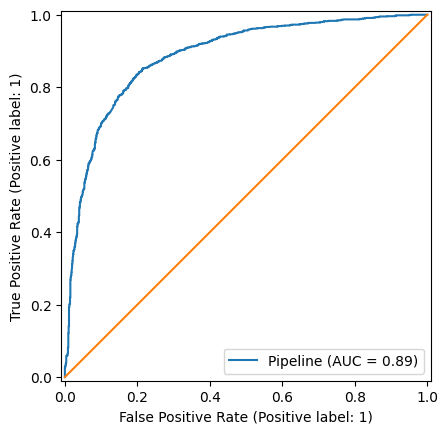

In [135]:
x = np.arange(0, 1.1, 0.1)
y = x
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot(x, y)
plt.show()

## 4. Вычисление ROC-AUC метрики

In [136]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8864829024470411

## 5. Подсчет TPR, FPR вручную

In [118]:
predict_proba = model.predict_proba(X_test)[:, 1]
predict_proba

array([0.20580396, 0.99263011, 0.86415304, ..., 0.13489506, 0.89197988,
       0.82153039])

In [111]:
treshold = np.arange(0, 1.1, 0.1)
tpr_lst = []
fpr_lst = []
for i in treshold:
    prediction = np.where((predict_proba >= i), 1, 0)
    TN = np.where((y_test == 0) & (y_test == prediction), 1, 0).sum()
    FN = np.where((y_test == 1) & (y_test != prediction), 1, 0).sum()
    TP = np.where((y_test == 1) & (y_test == prediction), 1, 0).sum()
    FP = np.where((y_test == 0) & (y_test != prediction), 1, 0).sum()
    tpr = TP / (TP + FN)
    tpr_lst.append(tpr)
    fpr = FP / (FP + TN)
    fpr_lst.append(fpr)

## 6.1 Строим ROC-кривую

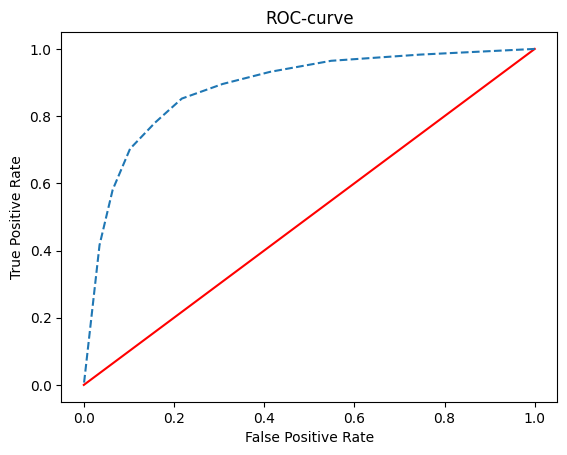

In [143]:
x = np.arange(0, 1.1, 0.1)
y = x
plt.plot(x, y, 'r')
plt.plot(fpr_lst, tpr_lst, '--')
plt.title('ROC-curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## 6.2 Сравниваем два результата

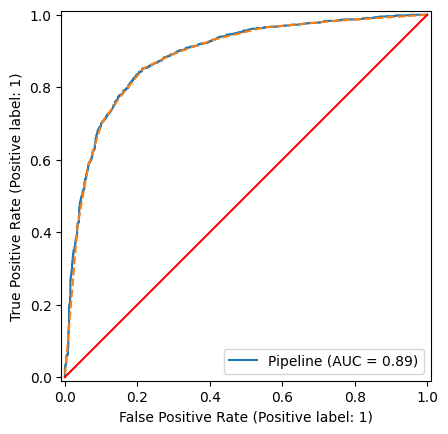

In [126]:
x = np.arange(0, 1.1, 0.1)
y = x
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot(fpr_lst, tpr_lst, "--")
plt.plot(x, y, 'red')
plt.show()

**Вывод**: Оба графика практически совпали

## 7. Построение графика Precision-Recall

In [169]:
treshold = np.arange(0, 1.01, 0.01)
prec_lst = []
rec_lst = []
for i in treshold:
    prediction = np.where((predict_proba >= i), 1, 0)
    TN = np.where((y_test == 0) & (y_test == prediction), 1, 0).sum()
    FN = np.where((y_test == 1) & (y_test != prediction), 1, 0).sum()
    TP = np.where((y_test == 1) & (y_test == prediction), 1, 0).sum()
    FP = np.where((y_test == 0) & (y_test != prediction), 1, 0).sum()
    prec = TP / (TP + FP)
    prec_lst.append(prec)
    rec = TP / (TP + FN)
    rec_lst.append(rec)

/tmp/ipykernel_9146/595299822.py:10: RuntimeWarning: invalid value encountered in scalar divide
  prec = TP / (TP + FP)


In [170]:
prec_arr = np.array(prec_lst)
prec_arr = np.nan_to_num(prec_arr, nan=1)
rec_arr = np.array(rec_lst)

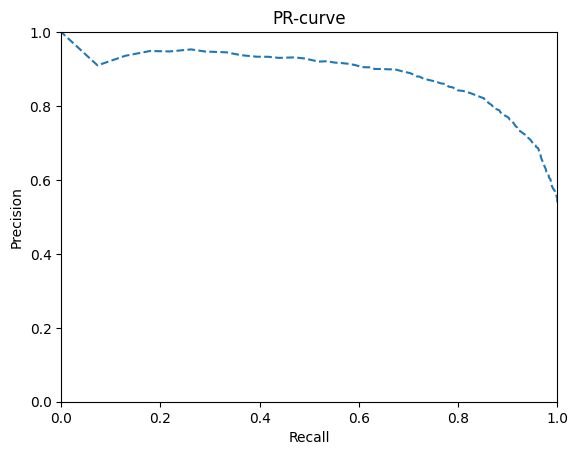

In [171]:
plt.plot(rec_arr, prec_arr, '--')
plt.title('PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

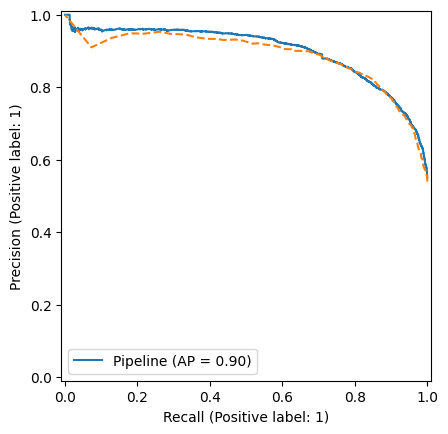

In [172]:
from sklearn.metrics import PrecisionRecallDisplay

# обучающая выборка
PrecisionRecallDisplay.from_estimator(model, X_train, y_train)
plt.plot(rec_arr, prec_arr, '--')
plt.show()

## 8. Вычисление ROC-AUC метрики

In [129]:
auc(fpr_lst, tpr_lst)

0.883975034663584

\* ROC-ривая может проходить ниже диагонали в случае неправильного кодирования целевой переменной. Худший вариант, когда кривая расположена по диагонали.